In [1]:
import torch

In [4]:
x = torch.tensor([3.0] , requires_grad=True)

In [5]:
y = x**2 

In [6]:
y

tensor([9.], grad_fn=<PowBackward0>)

In [7]:
# backword 

y.backward()

In [8]:
x.grad

tensor([6.])

In [9]:
a = torch.tensor([2.0 , 3.0 ] , requires_grad=True)
b = a**2 
b.backward()
a.grad

RuntimeError: grad can be implicitly created only for scalar outputs

In [10]:
x = torch.tensor([3.0] , requires_grad=True) # gradient wrt x independent dz/dx
y = x**2 

z = torch.sin(y)

z.backward()

x.grad


tensor([-5.4668])

In [11]:
x = torch.tensor([3.0] , requires_grad=True) # gradient wrt x independent dz/dx
y = x**2 

z = torch.sin(y)

z.backward()
z.backward()
x.grad


RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

In [12]:
x = torch.tensor([3.0] , requires_grad=True) # gradient wrt x independent dz/dx
y = x**2 

z = torch.sin(y)

z.backward()

x.grad

tensor([-5.4668])

In [16]:

x = torch.tensor([3.0] , requires_grad=True) 
z.backward()

x.grad

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

In [49]:
import torch

x = torch.tensor(5.0, requires_grad=True)
y = x**2
y.backward(retain_graph=True)  # Allows multiple backward passes
# x = torch.tensor(5.0, requires_grad=True)     # not as leaf x new location 
y.backward(retain_graph=True)  # No error
# 10 + 10 
print(x.grad)  # Output: 20.0 (because gradient is accumulated)


tensor(20.)


In [44]:
import torch

# Step 1: Create a tensor with requires_grad=True
x = torch.tensor(5.0, requires_grad=True)
y = x**2  # y = x^2

# Step 2: First backward pass
y.backward()  # Retain graph to allow further backward passes
print("Gradient after first backward:", x.grad)  # Output: 10.0

# Step 3: Manually change the value of x without creating a new tensor
with torch.no_grad():
    x.copy_(torch.tensor(6.0))  # Update x in place to a new value

print("Gradient before 2nd y backword backward:", x.grad)
# Step 4: Compute gradient again for the new value of x
y = x**2  # Use the new value of x
y.backward()  # Now it works with the new value
print("Gradient after changing x:", x.grad)  # Output for new x (should be 12.0)


Gradient after first backward: tensor(10.)
Gradient before 2nd y backword backward: tensor(10.)
Gradient after changing x: tensor(22.)


# requires_grad start creating a graph



##  they are store the val y**2 => 25 like this if change then again new graph will be created

## also they are not retaning a graph if want again but note without change val if chage then new only  y.backward(retain_graph=True) 


# but change of val fix new graph created


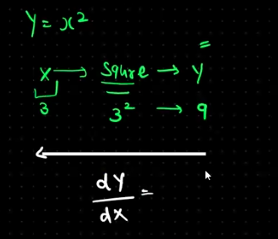

##### IMP " NEW VAL NEW GRAPH " 

In [2]:
import torch.nn as nn 

In [3]:
class Myclass(nn.Module) : 
    def __init__(self , new_fea):
        super().__init__()
        self.linear = nn.Linear(new_fea,1)
        self.sigmoid = nn.Sigmoid()
    def forward(self, x):
        out = self.linear(x)
        out = self.sigmoid(out)
        return out

    


callable function 

In [4]:
features = torch.randn(10,5)

In [5]:
features.shape

torch.Size([10, 5])

In [6]:
features.shape[0]

10

In [7]:
features.shape[1] #Number of columns

5

In [8]:
model = Myclass(features.shape[1])

# in callable class forward method class

In [18]:
class test:
    def __init__(self):
        print("hello from init")
    def __call__(self):
        print("hello from call")
    def testing(self):
        print("hello from testing")

In [9]:
model(features)

tensor([[0.6627],
        [0.6769],
        [0.3872],
        [0.7120],
        [0.4982],
        [0.6496],
        [0.6304],
        [0.6221],
        [0.6887],
        [0.6410]], grad_fn=<SigmoidBackward0>)

this are output of forward pass 

In [10]:
model.forward(features)

tensor([[0.6627],
        [0.6769],
        [0.3872],
        [0.7120],
        [0.4982],
        [0.6496],
        [0.6304],
        [0.6221],
        [0.6887],
        [0.6410]], grad_fn=<SigmoidBackward0>)

In [19]:
class Mymodel(nn.Module):
    def __init__(self , features):
        super().__init__()
        self.linear = nn.Linear(features,3)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(3,1)
        self.sigmoid = nn.Sigmoid()
    def forward(self,x):
        out = self.linear(x)
        out = self.relu(out)
        out = self.linear2(out)
        out = self.sigmoid(out)
        return out

In [20]:
model = Mymodel(features.shape[1])

In [21]:
model(features)

tensor([[0.5726],
        [0.5432],
        [0.5623],
        [0.5501],
        [0.6551],
        [0.5788],
        [0.6563],
        [0.5782],
        [0.5479],
        [0.6198]], grad_fn=<SigmoidBackward0>)

In [22]:
model.linear.weight

Parameter containing:
tensor([[ 0.1948,  0.0848,  0.0921,  0.2218,  0.0200],
        [-0.2103,  0.1696, -0.2558, -0.4037,  0.4420],
        [ 0.1276,  0.3114, -0.1396,  0.2593, -0.1085]], requires_grad=True)

In [23]:
model.linear.bias

Parameter containing:
tensor([ 0.1505,  0.2002, -0.4160], requires_grad=True)

In [30]:
class Mymodel(nn.Module):
    def __init__(self , features):
        super().__init__()
        self.sequentail = nn.Sequential(
            nn.Linear(features, 3),
            nn.ReLU(),
            nn.Linear(3,1),
            nn.Sigmoid()
        )
    def forward(self,x):
        out = self.sequentail(x)
        return out

In [31]:
model = Mymodel(features.shape[1])

In [32]:
model(features)

tensor([[0.7639],
        [0.5103],
        [0.5035],
        [0.6014],
        [0.5755],
        [0.6099],
        [0.8001],
        [0.5035],
        [0.5264],
        [0.6816]], grad_fn=<SigmoidBackward0>)

In [37]:
! pip install torchinfo

  Using cached torchinfo-1.8.0-py3-none-any.whl.metadata (21 kB)
Using cached torchinfo-1.8.0-py3-none-any.whl (23 kB)


In [3]:
from torchinfo import summary

In [40]:
summary(model)

Layer (type:depth-idx)                   Param #
Mymodel                                  --
├─Sequential: 1-1                        --
│    └─Linear: 2-1                       18
│    └─ReLU: 2-2                         --
│    └─Linear: 2-3                       4
│    └─Sigmoid: 2-4                      --
Total params: 22
Trainable params: 22
Non-trainable params: 0

In [4]:
import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder , OneHotEncoder

In [5]:
data=pd.read_csv("https://raw.githubusercontent.com/gscdit/Breast-Cancer-Detection/refs/heads/master/data.csv")

In [6]:
data.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN


In [7]:
data.drop(['id','Unnamed: 32'],axis=1,inplace=True)

In [45]:
data.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

only  0   diagnosis      object 
 rest are in float 

In [47]:
data["diagnosis"].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [48]:
data["diagnosis"].unique()

array(['M', 'B'], dtype=object)

In [49]:
data["diagnosis"].count()

569

In [8]:
y = data.iloc[:, 0]

In [9]:
x = data.iloc[:, 1:]

In [10]:
label = LabelEncoder()
y = label.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [58]:
len(y)

569

In [11]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [12]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [13]:
x_train = torch.from_numpy(x_train.astype(np.float32))

In [14]:
x_test = torch.from_numpy(x_test.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))

In [15]:
type(y_train)

torch.Tensor

In [16]:
import torch.nn as nn

In [17]:
class Mymodel(nn.Module):
    def __init__(self , features):
        super().__init__()
        self.sequentail = nn.Sequential(
            nn.Linear(features, 3),
            nn.ReLU(),
            nn.Linear(3,1),
            nn.Sigmoid()
        )
    def forward(self,x):
        out = self.sequentail(x)
        return out

In [18]:
x_train.shape[1]

30

In [19]:
model = Mymodel(x_train.shape[1])

In [20]:
summary(model)

Layer (type:depth-idx)                   Param #
Mymodel                                  --
├─Sequential: 1-1                        --
│    └─Linear: 2-1                       93
│    └─ReLU: 2-2                         --
│    └─Linear: 2-3                       4
│    └─Sigmoid: 2-4                      --
Total params: 97
Trainable params: 97
Non-trainable params: 0

In [21]:
learning_rate = 0.01
epocs = 10
loss = nn.BCELoss()

In [22]:
model.parameters()

<generator object Module.parameters at 0x000001766C6E2340>

In [23]:
optim = torch.optim.SGD(model.parameters(),lr=learning_rate)

In [24]:
y_train.shape

torch.Size([455])

In [25]:
for i in range(epocs):
    y_pred = model(x_train)
    loss_value = loss(y_pred , y_train.unsqueeze(1))
    optim.zero_grad()
    loss_value.backward()
    optim.step()
    print(f"Epocs {i} Loss {loss_value.item()}")


Epocs 0 Loss 0.6465206742286682
Epocs 1 Loss 0.6455844640731812
Epocs 2 Loss 0.6446484327316284
Epocs 3 Loss 0.6437119841575623
Epocs 4 Loss 0.6427764296531677
Epocs 5 Loss 0.6418411135673523
Epocs 6 Loss 0.6409066319465637
Epocs 7 Loss 0.6399731040000916
Epocs 8 Loss 0.6390396356582642
Epocs 9 Loss 0.6381057500839233


In [41]:
with torch.no_grad():

    y_pred = model(x_test)
    y_ans = []

    for i in range(y_pred.shape[0]):
        if y_pred[i] > 0.50:
            y_ans.append(1.0)
        else:
            y_ans.append(0.0)

    
    y_p = torch.tensor(y_ans)   
    acc = (y_p == y_test.unsqueeze(1)).sum() / y_test.shape[0]
    print(f"Accuracy {acc}")
    

Accuracy 56.122806549072266


# dataset is just for inilisation 

# dataloader is for do batches 

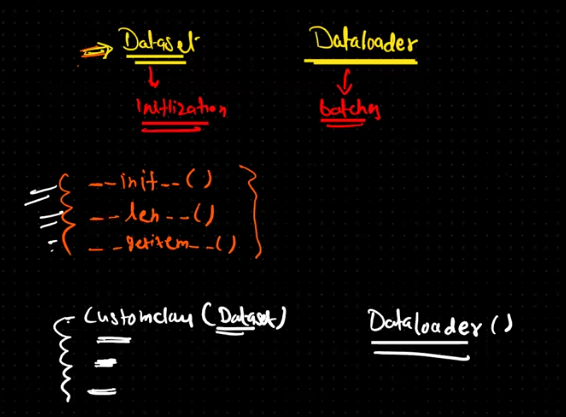

In [42]:
from sklearn.datasets import make_classification


In [43]:
x, y = make_classification(
    n_samples=10,      
    n_features=2,      
    n_informative=2,  
    n_redundant=0,   
    n_classes=2,       
    random_state=42     
)

In [44]:
x

array([[ 1.06833894, -0.97007347],
       [-1.14021544, -0.83879234],
       [-2.8953973 ,  1.97686236],
       [-0.72063436, -0.96059253],
       [-1.96287438, -0.99225135],
       [-0.9382051 , -0.54304815],
       [ 1.72725924, -1.18582677],
       [ 1.77736657,  1.51157598],
       [ 1.89969252,  0.83444483],
       [-0.58723065, -1.97171753]])

In [45]:
y

array([1, 0, 0, 0, 0, 1, 1, 1, 1, 0])

In [46]:
x = torch.from_numpy(x.astype(np.float32))
y = torch.from_numpy(y.astype(np.float32))

In [47]:
from torch.utils.data import DataLoader , Dataset

In [59]:
class MyClass(Dataset):
    def __init__(self , features , label):
        super().__init__()
        self.features = features
        self.label = label

    def __len__(self):
        return self.features.shape[0]
    
    def __getitem__(self , idx):
        return self.features[idx] , self.label[idx]

In [60]:
dataset = MyClass(x,y)

In [61]:
len(dataset)    

10

In [62]:
dataset[2]

(tensor([-2.8954,  1.9769]), tensor(0.))

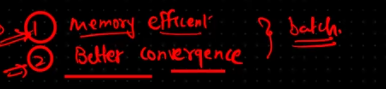

In [76]:
dataloader = DataLoader(dataset , batch_size=3 , shuffle=True )    

In [77]:
dataloader

In [78]:
for i , j in dataloader:
    print(i)
    
    print(j)
    print(" ")

tensor([[-2.8954,  1.9769],
        [-0.5872, -1.9717],
        [-0.9382, -0.5430]])
tensor([0., 0., 1.])
 
tensor([[-0.7206, -0.9606],
        [ 1.0683, -0.9701],
        [ 1.7273, -1.1858]])
tensor([0., 1., 1.])
 
tensor([[ 1.7774,  1.5116],
        [-1.9629, -0.9923],
        [ 1.8997,  0.8344]])
tensor([1., 0., 1.])
 
tensor([[-1.1402, -0.8388]])
tensor([0.])
 


In [79]:
dataloader = DataLoader(dataset , batch_size=3 , shuffle=True , drop_last=True)    


In [80]:
for i , j in dataloader:
    print(i)
    
    print(j)
    print(" ")

tensor([[-1.1402, -0.8388],
        [-2.8954,  1.9769],
        [-0.9382, -0.5430]])
tensor([0., 0., 1.])
 
tensor([[-0.5872, -1.9717],
        [-1.9629, -0.9923],
        [ 1.7774,  1.5116]])
tensor([0., 0., 1.])
 
tensor([[ 1.8997,  0.8344],
        [-0.7206, -0.9606],
        [ 1.0683, -0.9701]])
tensor([1., 0., 1.])
 


In [ ]:
i thinck as input 100 and rnn 150 

as thier is loop as in each hidden 250 val pass to 150 

and lastly we get only 1 last time steps 

number of parameter 

or it generate and pass also or it only pass it to next rnn ? 